# Graded Challenge 3

```txt
Adnan Rio
Batch 14
```

## Description

### Objective

```txt
1.  Mampu memperoleh data menggunakan BigQuery
2.  Mampu melakukan pemrosesan data sebelum melakukan perhitungan
3.  Mampu menerapkan konsep statistics descriptive dan inferential pada suatu permasalahan
4.  Mampu memahami konsep statistics descriptive dan inferential
```

### Problem Statement

```txt
Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.

1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.
  - Melihat rentang waktu pengambilan data
  - Ada apa saja tipe load sampah di kota Austin berdasarkan data
  - Mengetahui tempat pembuangan sampah ada dimana saja
  - dsb.

3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (**Caution:** Jangan gunakan pd.DataFrame.describe())

4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

5. Gunakan site yang kamu pilih untuk dicek apakah data `load_weight` ada outlier atau tidak. *Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!*. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data `load_weight`. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (`Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier`).

7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan `confidence interval`. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

8. Buatlah `analisa uji hipotesis` dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (**Ingat!** pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

9. Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan **hindari** bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!
```

## Working Area



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv('h8dsft_P0GC3_adnan_rio.csv')

 `query yang telah dibuat di Google Cloud Platform`

In [4]:
#SELECT 
#wad.load_time,
#wad.load_type,
#wad.load_weight,
#wad.dropoff_site, 
#FROM `bigquery-public-data.austin_waste.waste_and_diversion` AS wad
#LIMIT 150000

In [5]:
df.head(5) # Melihat 5 data teratas

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


In [6]:
df.tail()  # Melihat 5 data terbawah

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00 UTC,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


In [7]:
df.shape

(150000, 4)

In [8]:
df.info() # Mengecek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     150000 non-null  object 
 1   load_type     150000 non-null  object 
 2   load_weight   144934 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


In [9]:
df.isna().sum() # Missing value pada load_weight 5066

load_time          0
load_type          0
load_weight     5066
dropoff_site       0
dtype: int64

`-----------------------------Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.-------------------------
`

`1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb..
`

Grafik dari data load_weight, garis nilai median data load_weight dan garis nilai maen data load_weight dengan tujuan untuk menentukan nilai yang akan mengisi missing value dari data load_weight.

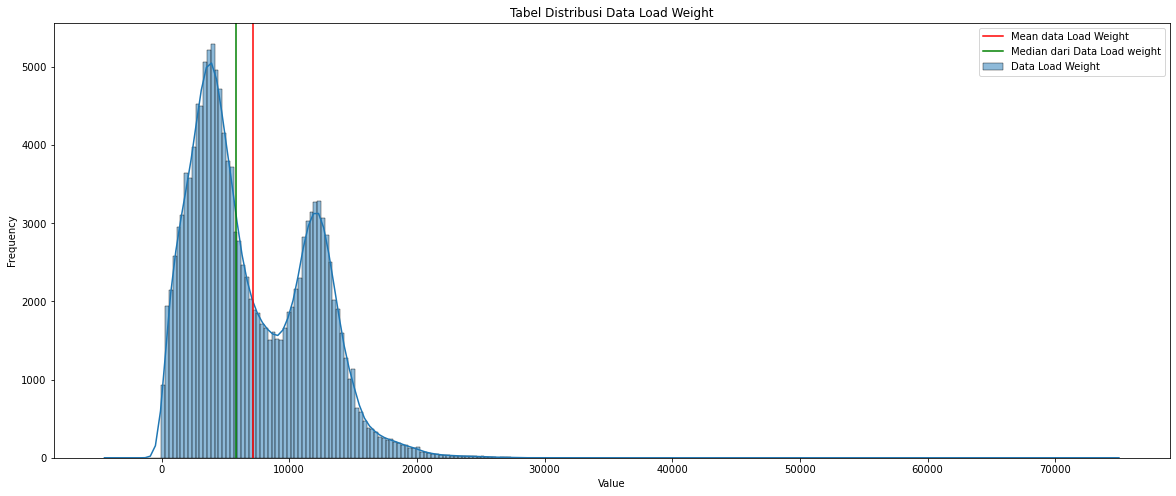

In [10]:
plt.figure(figsize=(20,8))
sns.histplot(df["load_weight"],kde=True,label="Data Load Weight")
plt.axvline(df["load_weight"].mean(),color="red",label="Mean data Load Weight")
plt.axvline(df["load_weight"].median(),color="green",label="Median dari Data Load weight")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Tabel Distribusi Data Load Weight")
plt.legend()
plt.show()

In [11]:
print(df["load_weight"].median())

5800.0


In [12]:
df["load_weight"].fillna(df["load_weight"].median(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   load_time     150000 non-null  object 
 1   load_type     150000 non-null  object 
 2   load_weight   150000 non-null  float64
 3   dropoff_site  150000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Berdasarkan hasil generate function dari data tesebut diperoleh tipe data dari ke-empat kolom tersebut yaitu kolom load_time dengan tipe data datetime, kolom load_type dengan tipe data object, kolom load_weight dengan tipe data float dan kolom dropoff_site dengan tipe data object. Hal yang kita bisa dapat disini adalah jika kita ingin melakukan pengolahan data berupa angka, maka kolom load_weight saja yang dapat diolah, sedangkan untuk kolom load_type dan dropoff_site yang bertipe object hanya bisa kita lihat untuk pemilihan data yang akan diolah (query).

`2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.`

In [13]:
df.dropoff_site.unique() # # Melihat dropoff_site list

array(['MRF', 'ELMONT', 'KRAMER', 'WILCAB', 'ZILKER', 'CLARKSON',
       'PARK BEND', 'TDS - MRF'], dtype=object)

In [14]:
# Menampilakan load_type apa saja yang ada di kota austin
print(df["load_type"].unique())
print(df["load_type"].unique().shape)

['RECYCLING - SINGLE STREAM' 'RECYCLING - PAPER' 'RECYCLING - COMINGLE'
 'SWEEPING' 'BRUSH' 'TIRES' 'BULK' 'RECYCLED METAL' 'YARD TRIMMING'
 'MIXED LITTER' 'GARBAGE COLLECTIONS' 'ORGANICS'
 'RECYCLING - PLASTIC BAGS' 'MULCH' 'LITTER' 'YARD TRIMMING - X-MAS TREES'
 'CONTAMINATED RECYCLING' 'DEAD ANIMAL']
(18,)


In [15]:
# Melihat rentang waktu pengambilan data
print("Mengambil data awal pada:",df.loc[0,"load_time"])
print("Mengambil data akhir pada:",df.loc[149999,"load_time"])

Mengambil data awal pada: 2009-08-07 11:51:00 UTC
Mengambil data akhir pada: 2011-07-20 11:21:00 UTC


In [16]:
print(df["load_weight"].mean()) # Total mean jumlah  load_weight di kota austin
print(df["load_weight"].median()) # Total median jumlah  load_weight di kota austin
print(df["load_weight"].mode()) # Total mode jumlah  load_weight di kota austin

7088.65162
5800.0
0    5800.0
Name: load_weight, dtype: float64


In [17]:
list_dropoff = df["dropoff_site"].unique()
for a in list_dropoff:
    Total_dropoff_site = df.loc[df["dropoff_site"]==a,"load_weight"].count()
    print(f"Total data load weight dropoff site {a} adalah: {Total_dropoff_site} data")
    print(" ")

Total data load weight dropoff site MRF adalah: 89625 data
 
Total data load weight dropoff site ELMONT adalah: 1462 data
 
Total data load weight dropoff site KRAMER adalah: 316 data
 
Total data load weight dropoff site WILCAB adalah: 2754 data
 
Total data load weight dropoff site ZILKER adalah: 1024 data
 
Total data load weight dropoff site CLARKSON adalah: 386 data
 
Total data load weight dropoff site PARK BEND adalah: 396 data
 
Total data load weight dropoff site TDS - MRF adalah: 54037 data
 


`3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota?`

In [18]:
def central_tendency(b):
    rata2 = df.loc[df["dropoff_site"]==b,"load_weight"].mean()
    median = df.loc[df["dropoff_site"]==b,"load_weight"].median()
    modus = df.loc[df["dropoff_site"]==b,"load_weight"].mode()[0]
    print(f"Nilai dari mean dari drop off site {b} adalah:",rata2)
    print(f"Nilai dari median dari drop off site {b} adalah:",median)
    print(f"Nilai dari modus dari drop off site {b} adalah:",modus)
    print(" ")

for c in list_dropoff:
    central_tendency(c)

Nilai dari mean dari drop off site MRF adalah: 5305.141835425384
Nilai dari median dari drop off site MRF adalah: 4260.0
Nilai dari modus dari drop off site MRF adalah: 3460.0
 
Nilai dari mean dari drop off site ELMONT adalah: 5832.501367989056
Nilai dari median dari drop off site ELMONT adalah: 5800.0
Nilai dari modus dari drop off site ELMONT adalah: 5800.0
 
Nilai dari mean dari drop off site KRAMER adalah: 5855.632911392405
Nilai dari median dari drop off site KRAMER adalah: 5800.0
Nilai dari modus dari drop off site KRAMER adalah: 5800.0
 
Nilai dari mean dari drop off site WILCAB adalah: 5817.0660856935365
Nilai dari median dari drop off site WILCAB adalah: 5800.0
Nilai dari modus dari drop off site WILCAB adalah: 5800.0
 
Nilai dari mean dari drop off site ZILKER adalah: 9316.125
Nilai dari median dari drop off site ZILKER adalah: 7290.0
Nilai dari modus dari drop off site ZILKER adalah: 15000.0
 
Nilai dari mean dari drop off site CLARKSON adalah: 5833.264248704663
Nilai dari 

Disini kita mendapat beberapa informasi yang menarik diantaranya:

-   Nilai mean tertinggi terdapat pada site TDS-MRF dengan nilai 10116.689435016748.
-   Nilai mean terendah terdapat pada site MDF dengan nilai 5305.141835425384.
-   Nilai median tertinggi terdapat pada site TDS-MRF dengan nilai 10960.0.
-   Nilai median terendah terdapat pada site MRF dengan nilai 4260.0.
-   Nilai modus tertinggi terdapat pada site ZILKER dengna nilai 15000.0.
-   Nilai modus terendah terdapat pada site MRF dengan nilai 3460.0.

Dari eksplorasi data tersebut terdapat beberapa hal yang menarik perhatian:

-   Drop off site MRF memiliki data terbanyak tetapi memiliki nilai central of tendency terkecil diantara site lainnya.
-   Drop off site TDS-MRF miliki data terbanyak kedua tetapi memiliki nilai central of tendency rata-rata dan median tertinggi.
-   Drop off site WILCAB, ELMONT, KRAMER dan CLARKSON memiliki kemiripan nilai rata-rata walaupun tidak sama persis, tetapi keempat site tersebut memiliki nilai median dan modus yang sama.

`4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.`

In [19]:
# MRF jumlah load_weight terbanyak tapi dengan central of tendency terendah
EDA_MRF = df.loc[df["dropoff_site"]=="MRF","load_weight"].reset_index(drop=True)
EDA_TDS_MRF = df.loc[df["dropoff_site"]=="TDS - MRF","load_weight"].reset_index(drop=True)

Nilai dari Skewness data load weight dari dropoff site MRF adalah: 1.0010205810425368
Nilai dari Kurtosis data load weight dari dropoff site MRF adalah: 0.1685185345475344


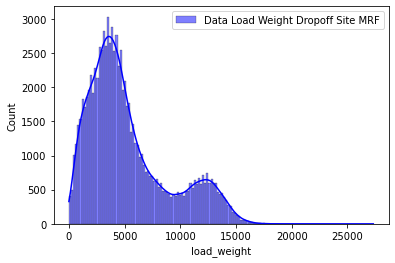

In [22]:
print("Nilai dari Skewness data load weight dari dropoff site MRF adalah:",EDA_MRF.skew())
print("Nilai dari Kurtosis data load weight dari dropoff site MRF adalah:",EDA_MRF.kurt())
sns.histplot(EDA_MRF,kde=True,label="Data Load Weight Dropoff Site MRF",color="blue")
plt.legend()

In [ ]:
# Grafik distribusi bahwa data tersebut tidak mengikuti distribusi normal dengan tipe skew right dan grafik yang terdapat dua puncak dari data tersebut sehingga nilai kurtosis disini menjadi tidak pasti.

Nilai dari Skewness data load weight dari dropoff site TDS-MRF adalah: -0.1980694791684961
Nilai dari Kurtosis data load weight dari dropoff site TDS-MRF adalah: -0.38273888871747896


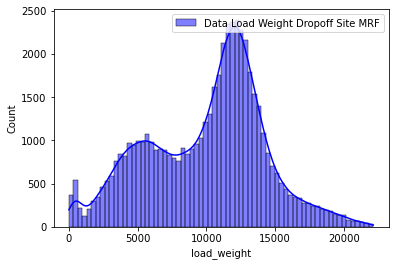

In [42]:
# TDS - MRF memiliki nilai mean dan median tertinggi.
print("Nilai dari Skewness data load weight dari dropoff site TDS-MRF adalah:",EDA_TDS_MRF.skew())
print("Nilai dari Kurtosis data load weight dari dropoff site TDS-MRF adalah:",EDA_TDS_MRF.kurt())
sns.histplot(EDA_TDS_MRF,kde=True,label="Data Load Weight Dropoff Site MRF",color="blue")
plt.legend()

In [ ]:
# Grafik distribusi bahwa data tersebut tidak mengikuti distribusi normal dengan tipe skew right dan grafik yang terdapat dua puncak dari data tersebut sehingga nilai kurtosis disini menjadi tidak pasti.

In [ ]:
# Dari 2 visualisi diatas terlihat dari nilai skewness dan kurtosis terhadap dropoff_site disini ,data memiliki kecenderungan terpusat di tengah sehingga mengartikan bahwa persebaran data tersebut tidak menyebar dengan baik.

`5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3)`

`5a. Outlier Checking`

In [46]:
def hapus_outier(e):
    iqr_data = e.quantile([0.75])[0.75] - e.quantile([0.25])[0.25]
    batas_atas = e.quantile([0.75])[0.75] + 1.5*iqr_data
    batas_bawah = e.quantile([0.25])[0.25] - 1.5*iqr_data
    for d in range(0,len(e)):
        if e[d] > batas_atas or e[d] < batas_bawah:
            del e[d]
        else:
            continue
    e.reset_index(drop=True,inplace=True)
    plt.figure(figsize=(10,10))
    e.plot(kind="box",title="Boxplot Data Setelah Hapus Outlier")

In [ ]:
plt.figure(figsize=(10,10))
EDA_MRF.plot(kind="box",title="Box plot Data MRF")

In [ ]:
hapus_outier(EDA_MRF)

In [ ]:
hapus_outier(EDA_MRF) # Dikarena masih ada outlier lakukan syantax di samping secara berulang sampai tidak ada outlier yang terlihat pada visualisi boxplot

In [ ]:
hapus_outier(EDA_MRF) # Dikarena masih ada outlier lakukan syantax di samping secara berulang sampai tidak ada outlier yang terlihat pada visualisi boxplot

In [ ]:
hapus_outier(EDA_MRF) # Dikarena masih ada outlier lakukan syantax di samping secara berulang sampai tidak ada outlier yang terlihat pada visualisi boxplot

In [ ]:
hapus_outier(EDA_MRF) # Dikarena masih ada outlier lakukan syantax di samping secara berulang sampai tidak ada outlier yang terlihat pada visualisi boxplot

In [ ]:
hapus_outier(EDA_MRF) # Bisa dilihat tidak ada outlier yang terlihat pada visualisi boxplot

In [ ]:
hapus_outier(EDA_TDS_MRF) # Dikarena masih ada outlier lakukan syantax di samping secara berulang sampai tidak ada outlier yang terlihat pada visualisi boxplot

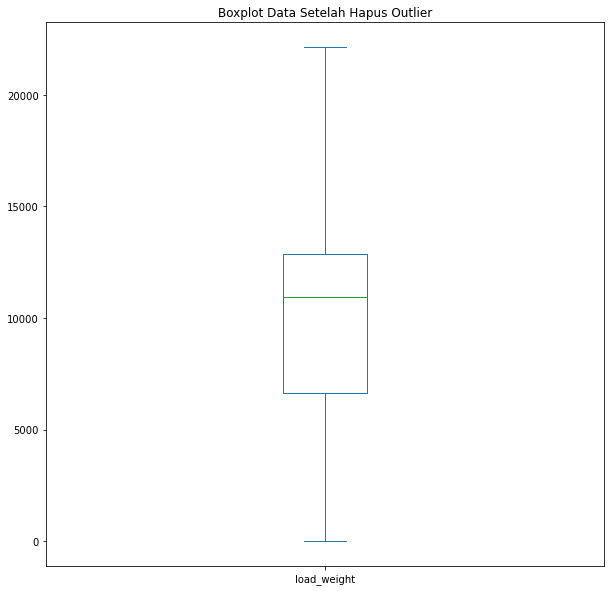

In [50]:
hapus_outier(EDA_TDS_MRF) #  Bisa dilihat tidak ada outlier yang terlihat pada visualisi boxplot

`-b. Extreme Value Analysis`

Analisis Central of Tendency sesudah dilakukannya pembersihan data outliers.

In [51]:
def EDA_CT_NO(f):
    print("Jumlah data setelah pengurangan data outlier adalah:",f.count())
    print("Nilai mean setelah tidak ada outlier adalah:",f.mean())
    print("Nilai median setelah tidak ada outlier adalah:",f.median())
    print("Nilai modus setelah tidak ada outlier adalah:",f.mode()[0])

In [52]:
EDA_CT_NO(EDA_MRF)

Jumlah data setelah pengurangan data outlier adalah: 74821
Nilai mean setelah tidak ada outlier adalah: 3940.5568891086727
Nilai median setelah tidak ada outlier adalah: 3740.0
Nilai modus setelah tidak ada outlier adalah: 3460.0


Perbandingan central of tendency data load_weight di dropoff_site MRF sebagai berikut:

-   Jumlah data load weight pada dropoff_site MRF sebelum adalah: 89625 data
-   Jumlah data load weight pada dropoff_site MRF setelah tidak ada outlier adalah: 74821 data
-   Nilai dari rata-rata dari dropoff_site MRF sebelum adalah: 5305.141835425384
-   Nilai dari rata-rata dari dropoff_site MRF setelah tidak ada outlier adalah: 3940.5568891086727
-   Nilai dari median dari dropoff_site MRF sebelum adalah: 4260.0
-   Nilai dari median dari dropoff_site MRF setelah tidak ada outlier adalah: 3740.0
-   Nilai dari modus dari dropoff_site MRF sebelum adalah: 3460.0
-   Nilai dari modus dari dropoff_site MRF setelah tidak ada outlier adalah: 3460.0

Pada jumlah data ada penurunan, mean dan median dikarenakan penghapusan data outliner, sedangkan untuk nilai modus tetap tidak berubah. Penurunan jumlah data sebesar 16.5%, penurunan rata-rata sebesar 25.7% dan penurunan median sebesar 12.2%.

In [47]:
EDA_CT_NO(EDA_TDS_MRF)

Jumlah data setelah pengurangan data outlier adalah: 53740
Nilai mean setelah tidak ada outlier adalah: 10039.086378861184
Nilai median setelah tidak ada outlier adalah: 10920.0
Nilai modus setelah tidak ada outlier adalah: 12300.0


`-d. Central Tendency dropoff_site `

Perbandingan central of tendency data load_weight di dropoff_site TDS - MRF sebagai berikut:

-   Jumlah data load weight pada dropoff site TDS - MRF sebelum adalah: 54037 data
-   Jumlah data load weight pada dropoff site TDS - MRF setelah tidak ada outlier adalah: 53740 data
-   Nilai dari rata-rata dari drop off site TDS - MRF sebelum adalah: 10116.689435016748
-   Nilai dari rata-rata dari drop off site TDS - MRF setelah tidak ada outlier adalah: 10039.086378861184
-   Nilai dari median dari drop off site TDS - MRF sebelum adalah: 10960.0
-   Nilai dari median dari drop off site TDS - MRF setelah tidak ada outlier adalah: 10920.0
-   Nilai dari modus dari drop off site TDS - MRF sebelum adalah: 12300.0
-   Nilai dari modus dari drop off site TDS - MRF setelah tidak ada outlier adalah: 12300.0

Pada jumlah data ada penurunan, mean dan median dikarenakan penghapusan data outliner, sedangkan untuk nilai modus tetap tidak berubah. Penurunan jumlah data sebesar 16.5%, penurunan rata-rata sebesar 0.55% dan penurunan median sebesar 0.77%.

`6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier)`

In [55]:
def EDA_VD(g):
    print("Nilai minimum data:",g.min())
    print("Nilai maximum data:",g.max())
    print("Nilai range data:",g.max() - g.min())
    print("Nilai standar deviasi data:",g.std())
    print("Nilai dari variansi data:",g.var())

In [56]:
# Variance

EDA_VD(EDA_MRF)

Nilai minimum data: 0.0
Nilai maximum data: 9480.0
Nilai range data: 9480.0
Nilai standar deviasi data: 2099.5480807287795
Nilai dari variansi data: 4408102.143291901


Kita mendapat informasi bahwa range, standar deviasi dan varansi dari data load_weight dropoff_site MRF adalah 9480, 2099.5480807287663 dan 4408102.143291847. Hal yang kita dapat dari data tersebut adalah bahwa drop_off_site sampah pada MRF berada di range 9480 dengan rentang 2099.5480807287663. Maksud dari hal tersebut adalah bahwa jumlah sampah yang di dropoff_site MRF berada di sekitar (9480 - 2099.5480807287663) dan (9480 + 2099.5480807287663)

In [58]:
EDA_VD(EDA_TDS_MRF)

Nilai minimum data: 0.0
Nilai maximum data: 22140.0
Nilai range data: 22140.0
Nilai standar deviasi data: 4282.098008467219
Nilai dari variansi data: 18336363.35411893


Kita mendapat informasi bahwa range, standar deviasi dan varansi dari data load_weight dropoff_site TDS_MRF adalah 22140.0, 4282.098008467237 dan 18360370.914560582. Hal yang kita dapat dari data tersebut adalah bahwa dropoff_site sampah pada MRF berada di range 22140.0 dengan rentang 4282.098008467237. Maksud dari hal tersebut adalah bahwa jumlah sampah yang di dropoff_site TDS_MRF berada di sekitar (22140.0 - 4282.098008467237) dan (22140.0 + 4282.098008467237)

`7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site`

- Saran untuk austin state capital city government adalah tidak perlu menambah site dikarenakan terdapat ke-tidak-rataan drop off sampah yang terjadi di kota Austin, seperti pada site WILCAB, ELMONT, KRAMER dan CLARKSON terjadi kekosongan sampah. Maka pemerintah perlu melakukan pemerataan drop off sampah agar sampah di kota Austin menjadi tertampung dengan baik.

`8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima`

`-a.    T-test One sample Two tail`

H0 =  MRF = μ TDS - MRF

H1 =  MRF != μ TDS - MRF

In [64]:
rata2_MRF = EDA_MRF.mean()
std_MRF = EDA_MRF.std()
rata2_TDS_MRF = EDA_TDS_MRF.mean()
std_TDS_MRF = EDA_TDS_MRF.std()
alfa = 0.05
t_hitung,nilai_p = stats.ttest_ind(EDA_MRF,EDA_TDS_MRF)
print("Nilia dari rata-rata load weight MRF adalah:",rata2_MRF)
print("Nilai dari standar deviasi load weight MRF adalah:",std_MRF)
print("Nilai dari rata-rata load weight TDS - MRF adalah:",rata2_TDS_MRF)
print("Nilai dari standar deviasi dari load weight TDS - MRF adalah:",std_TDS_MRF)
print("Nilai alfa yang digunakan adalah:",alfa)
print("Nilai dari P adalah:",nilai_p)
print("Nilai dari t hitung adalah:",t_hitung)

Nilia dari rata-rata load weight MRF adalah: 3940.5568891086727
Nilai dari standar deviasi load weight MRF adalah: 2099.5480807287795
Nilai dari rata-rata load weight TDS - MRF adalah: 10039.086378861184
Nilai dari standar deviasi dari load weight TDS - MRF adalah: 4282.098008467219
Nilai alfa yang digunakan adalah: 0.05
Nilai dari P adalah: 0.0
Nilai dari t hitung adalah: -337.20014340493174


In [65]:
EDA_MRF_pop = np.random.normal(rata2_MRF,std_MRF,1000000)
EDA_TDS_MRF_pop = np.random.normal(rata2_TDS_MRF,std_TDS_MRF,1000000)
rata2_MRF_pop = EDA_MRF_pop.mean()
std_mrf_pop = EDA_MRF_pop.std()
nilai_ci = stats.norm.interval(0.95,rata2_MRF,std_MRF)


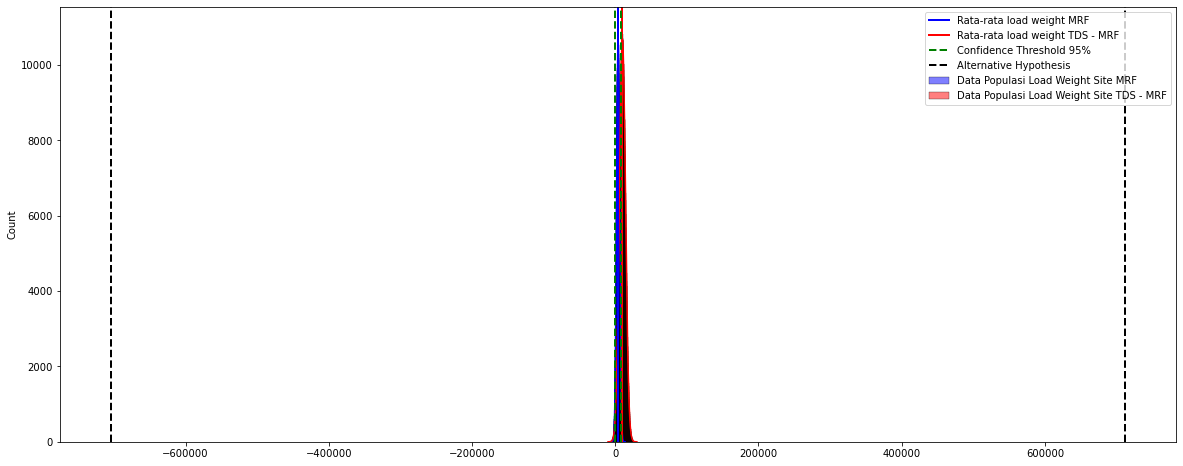

In [66]:
plt.figure(figsize=(20,8))
sns.histplot(EDA_MRF_pop,kde=True,label="Data Populasi Load Weight Site MRF",color="blue")
sns.histplot(EDA_TDS_MRF_pop,kde=True,label="Data Populasi Load Weight Site TDS - MRF",color="red")
plt.axvline(rata2_MRF,color="blue",linewidth=2,label="Rata-rata load weight MRF")
plt.axvline(rata2_TDS_MRF,color="red",linewidth=2,label="Rata-rata load weight TDS - MRF")
plt.axvline(nilai_ci[1],color="green",linestyle="dashed",linewidth=2,label="Confidence Threshold 95%")
plt.axvline(nilai_ci[0],color="green",linestyle="dashed",linewidth=2)
plt.axvline(rata2_MRF_pop+t_hitung*std_mrf_pop,color="black",linestyle="dashed",linewidth=2,label="Alternative Hypothesis")
plt.axvline(rata2_MRF_pop-t_hitung*std_mrf_pop,color="black",linestyle="dashed",linewidth=2)
plt.legend()
plt.show()

Berdasarkan grafik tersebut terlihat bahwa garis hitam berada diluar area garis hijau, yang dimana hal tersebut berarti bahwa mean load_weight dropoff_site MRF tidak sama dengan rata-rata dropoff_site TDS - MRF.

`9. Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!`

-   Nilai dari mean load weight setiap dropoff_site berbeda-beda, dengan persebaran data yang tidak merata yang ditujukan oleh nilai mean yang berbeda dan grafik yang tidak berdistribusi normal.
-   Terdapat dropoff_site yang missing value oleh load_weight sampah, sehingga memunculkan kesenjangan load_weight di setiap dropoff_site.
-   Diperlukan pendataan lebih lanjut dikarenakan terdapat banyak missing value pada load_weight di beberapa dropoff_site.
-   Banyak data yang tidak terisi load_weight di beberapa dropoff_site yang sangat berpengaruh secara persentase disebabkan missing value

`--------------------------------------Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu---------------------------------`

`1. Apa perbedaan statistik deskriptif dan inferensial?`
Statistik deskriptif hanya terbatas dalam menyajikan data dalam bentuk tabel, diagram, grafik,dan besaran lain, sedangkan statistik inferensial selain mencakup statistik deskriptif juga dapat digunakan untuk melakukan estimasi dan penarikan kesimpulan terhadap populasi dari sampelnya. Untuk sampai pada penarikan kesimpulan statistik inferensial melalui tahap uji hipotesis dan uji statistik

`2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?`
- Hasil 'Central Tendency' terhadap dropoff_site 'TDS - MRF' tidak ada perbedaan yang signifikan dari jumlah mean dan median, juga nilai modus yang di dapatkan ketika masih terdapat outlier dan yang tidak terdapat outlier ternyata sama.

- Persebaran data terbanyak terdapat di tengah, sedangkan nilai persebaran data terkecil (baik positif maupun negative) terdapat di ujung kiri dan kanan.

- Metrik yang dapat digunakan untuk menyimpulkan data terdistribusi normal atau tidak adalah mean, median, dan modus

`3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!` Menggunakan teknik Tukey dengan IQR untuk menghandle outlier Karena persebaran datanya tidak terdistribusi normal.

`4.  Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?`Memberikan satu nilai yang dapat mewakili/menggambarkan seluruh skor dalam kelompok, merupakan deskripsi ringkas dari sejumlah data kuantitatif yang didapat dari sampel dengan ekonomis, praktis, dan ringkas. Dengan central tendency memungkinkan kita melakukan perbandingan antar kelompok; serta memungkinkan kita untuk melakukan proses statistik berikutnya seperti melihat hubungan (korelasi), perbedaan (t-test) antar kelompok, dan lain sebagainya.

`5.  Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?` One Sample Two Tailed, disebabkan pada dataset saya membandingkan satu sample terhadap populasi, 
load_weight yang mempunyai outlier
load_weight yang tidak mempunyai outlier
